In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples, adjusted_rand_score
%matplotlib inline
data = pd.read_csv("./adult.csv", index_col=0)

In [72]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [73]:
# data = data.drop('workclass', 1)
# data = data.drop('fnlwgt', 1)
# data = data.drop('education', 1)
# data = data.drop('education_num', 1)
# data = data.drop('marital_status', 1)
# data = data.drop('occupation', 1)
# data = data.drop('relationship', 1)
# data = data.drop('capital_gain', 1)
# data = data.drop('capital_loss', 1)

data.drop(['workclass', 'fnlwgt', 'occupation', 'education_num', 'marital_status', 'relationship', 'capital_gain', 'capital_loss' ], axis=1, inplace=True)


In [74]:
data

,age,education,race,sex,hours_per_week,native_country,income
1,39,Bachelors,White,Male,40,United-States,<=50K
2,50,Bachelors,White,Male,13,United-States,<=50K
3,38,HS-grad,White,Male,40,United-States,<=50K
4,53,11th,Black,Male,40,United-States,<=50K
5,28,Bachelors,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...
32557,27,Assoc-acdm,White,Female,38,United-States,<=50K
32558,40,HS-grad,White,Male,40,United-States,>50K
32559,58,HS-grad,White,Female,40,United-States,<=50K
32560,22,HS-grad,White,Male,20,United-States,<=50K


In [75]:
data.shape

(32561, 7)

In [76]:
data[["income", 'education', 'race', 'sex']].value_counts()

income  education      race                 sex    
 <=50K   HS-grad        White                Male      4893
         Some-college   White                Male      2857
         HS-grad        White                Female    2469
         Some-college   White                Female    2095
 >50K    Bachelors      White                Male      1727
                                                       ... 
         5th-6th        Other                Male         1
         7th-8th        White                Female       1
         9th            Asian-Pac-Islander   Female       1
         Assoc-acdm     Amer-Indian-Eskimo   Female       1
         Prof-school    Amer-Indian-Eskimo   Female       1
Length: 248, dtype: int64

In [77]:
data["income"].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [78]:
data.drop(['education', 'race', 'sex', 'native_country'], axis=1, inplace=True)

In [79]:
data

,age,hours_per_week,income
1,39,40,<=50K
2,50,13,<=50K
3,38,40,<=50K
4,53,40,<=50K
5,28,40,<=50K
...,...,...,...
32557,27,38,<=50K
32558,40,40,>50K
32559,58,40,<=50K
32560,22,20,<=50K


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Dividindo x e y
x = data.drop(columns="income").values 
# PS: NUNCA ESQUEÇA DE TIRAR A RESPOSTA DO CONJUNTO DE CARACTERÍSTICAS!!!
y = data['income']

# Dividindo dados para treino e dados para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

# Treinando o modelo
model = LogisticRegression().fit(x_train, y_train)

# Fazendo as predições
y_pred = model.predict(x_test)

In [81]:
x_test

array([[27, 38],
       [45, 40],
       [29, 55],
       ...,
       [24, 40],
       [56, 40],
       [44, 40]])

In [82]:
y_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [83]:
list(y_pred[:20])

[' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' >50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K']

In [84]:
list(y_test[:20])

[' <=50K',
 ' <=50K',
 ' >50K',
 ' <=50K',
 ' <=50K',
 ' >50K',
 ' >50K',
 ' <=50K',
 ' <=50K',
 ' >50K',
 ' <=50K',
 ' <=50K',
 ' >50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' >50K',
 ' <=50K',
 ' >50K',
 ' <=50K']

In [85]:
pd.DataFrame({'pred': y_pred, 'resp': y_test})

,pred,resp
14161,<=50K,<=50K
27049,<=50K,<=50K
28869,<=50K,>50K
5668,<=50K,<=50K
7828,<=50K,<=50K
...,...,...
32477,>50K,<=50K
21101,<=50K,<=50K
27132,<=50K,<=50K
25527,<=50K,>50K


In [92]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7545296345582967

In [93]:
len(y_pred)

9769

In [94]:
len(y_pred)*0.7545296

7370.9996624000005

In [95]:
len(y_pred)*0.04

390.76

In [ ]:
# Dos 9769

In [96]:
# Matriz de confusão

In [97]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[7127,  328],
       [2070,  244]])

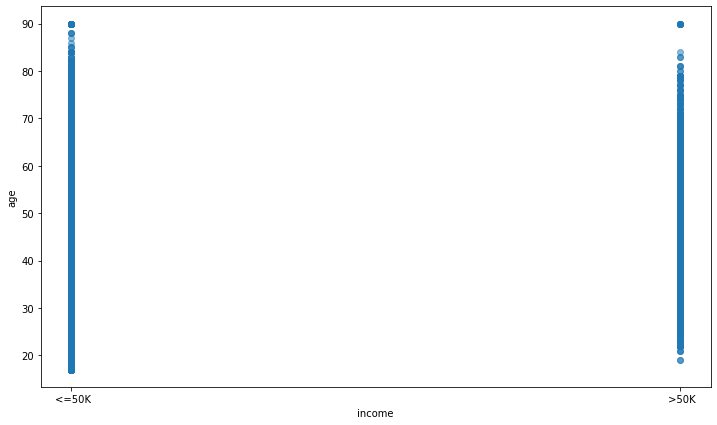

In [109]:
plt.rcParams['figure.figsize'] = (12, 7)
plt.scatter(data.income, data.age, alpha=0.5)
plt.xlabel('income')
plt.ylabel('age')
plt.show()